<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Toyota_corolla_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statment:

## Prepare a prediction model for predicting Price of the car

### Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ToyotaCorolla.csv', encoding='latin-1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


Checking Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

We working with the refrences columns

In [ ]:
toy=df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

Duplicate value check and drop

In [ ]:
toy[toy.duplicated(keep=False)]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toy1=toy.drop_duplicates()

There is null value present in side the data set and also the data type are appopriate in the all attributes

### The datatypes of the Model, Fuel_Type, Color columns is an object with categorial data. we remove these columns

In [ ]:
toy1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Checking for outliers with histogram and boxplot in the price columns

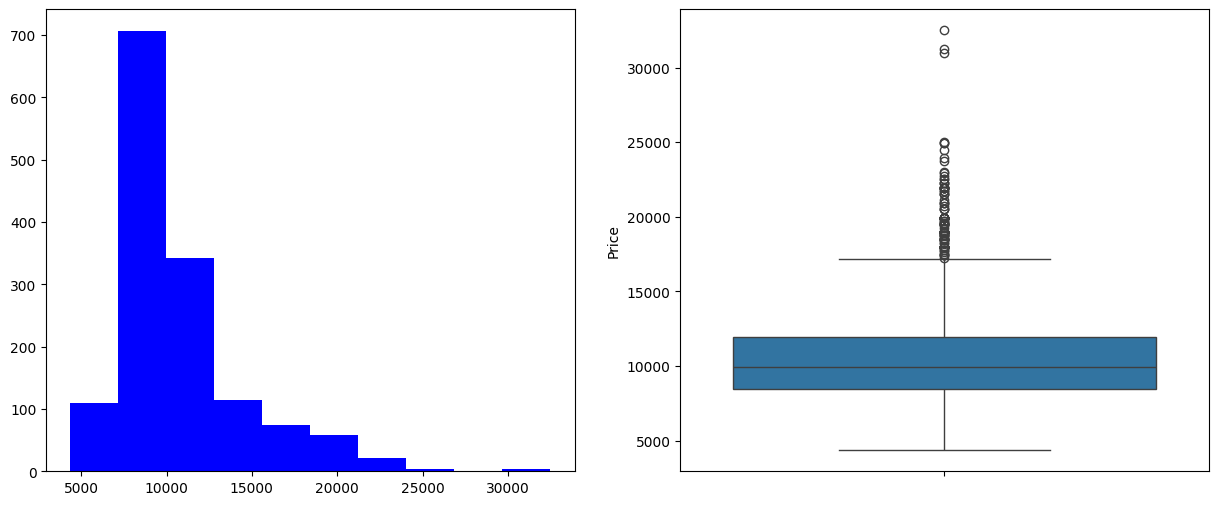

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['Price'], color='blue')
plt.subplot(1,2,2)
sns.boxplot(df['Price'])
plt.show()

## Checking the Outliers, with histogram and boxplot in the KM columns

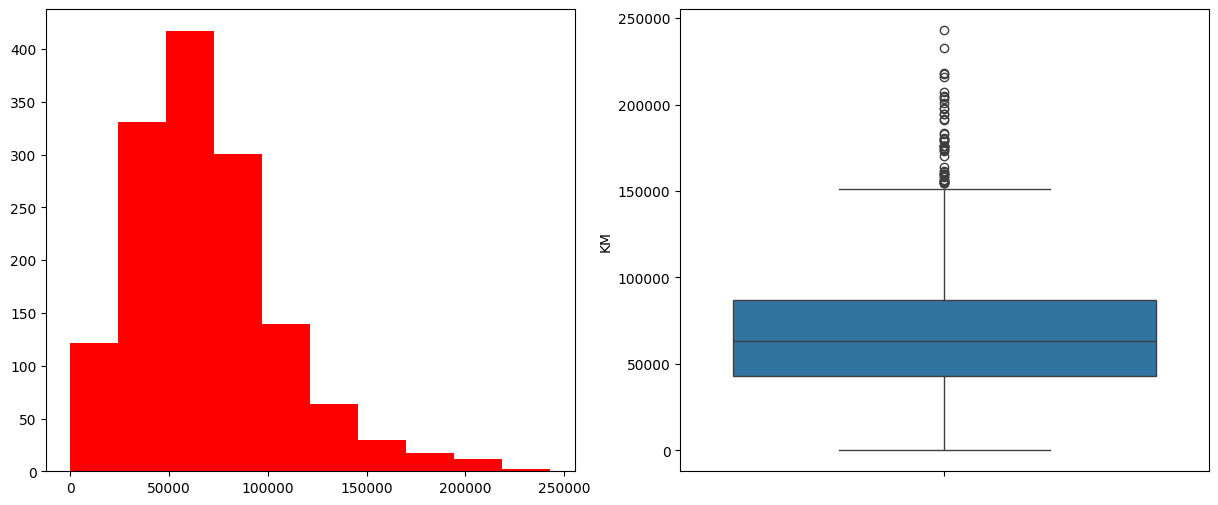

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['KM'], color='red')
plt.subplot(1,2,2)
sns.boxplot(df['KM'])
plt.show()

### Checking the outliers with histogram and boxplot in the HP column

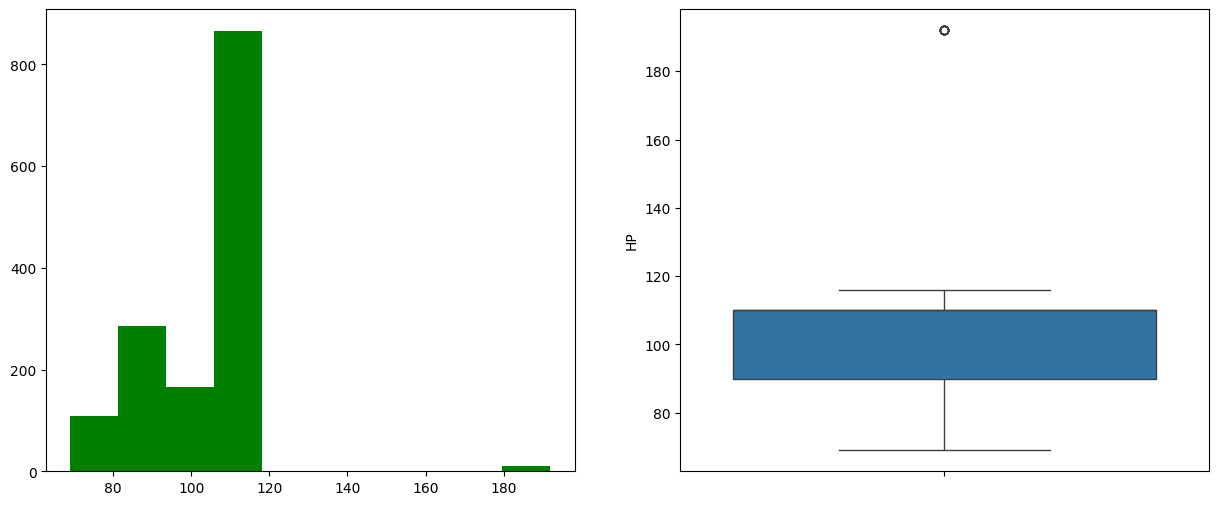

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['HP'], color='green')
plt.subplot(1,2,2)
sns.boxplot(df['HP'])
plt.show()

Checking any outliers with the help of histogram and boxplot of the Age_08_4 columns

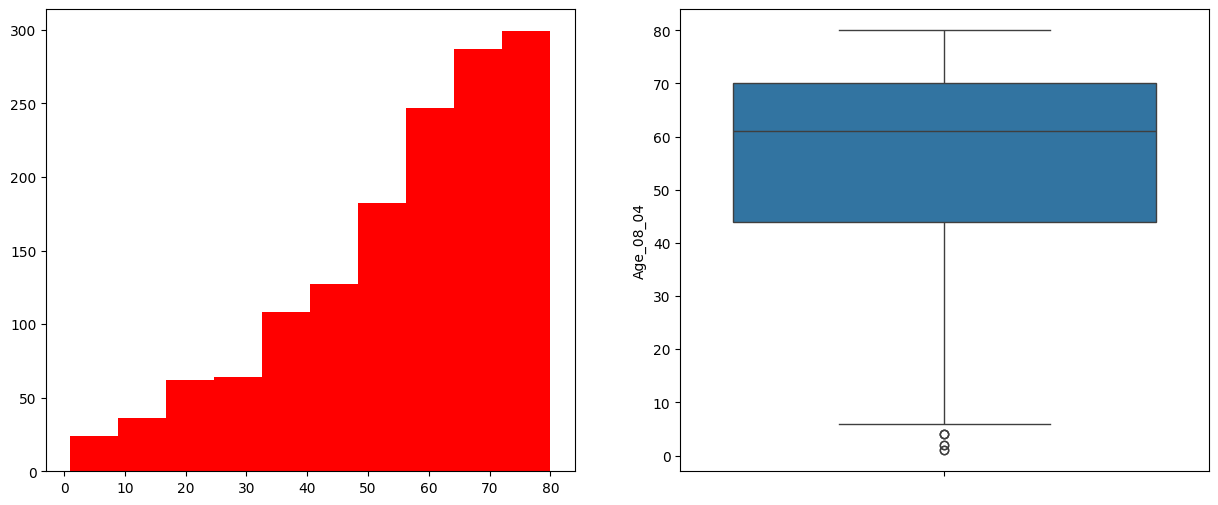

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['Age_08_04'], color='red')
plt.subplot(1,2,2)
sns.boxplot(df['Age_08_04'])
plt.show()

Checking the ourliers in the column door

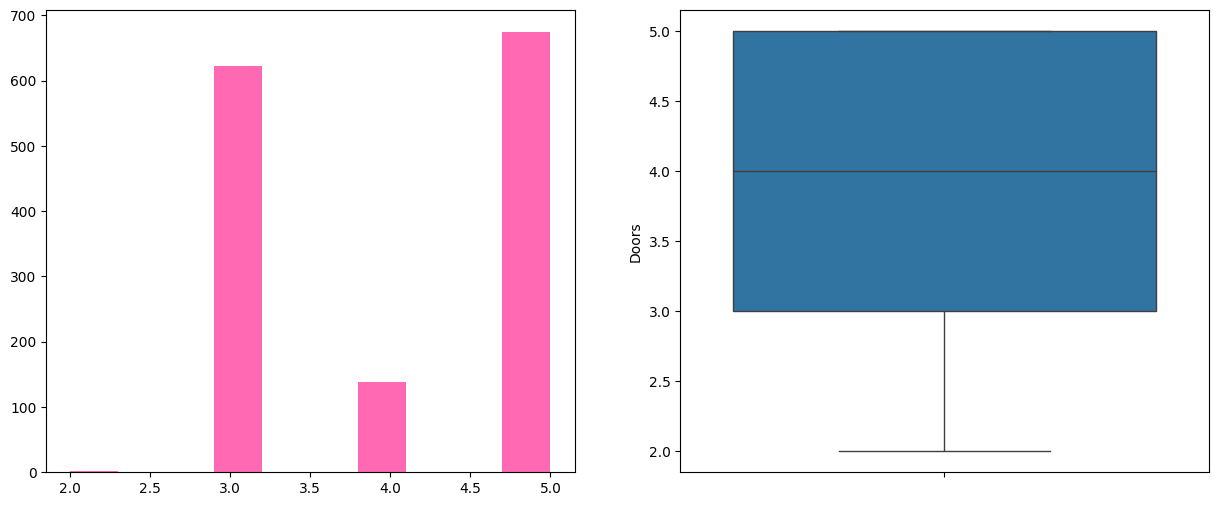

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['Doors'], color='Hotpink')
plt.subplot(1,2,2)
sns.boxplot(df['Doors'])
plt.show()

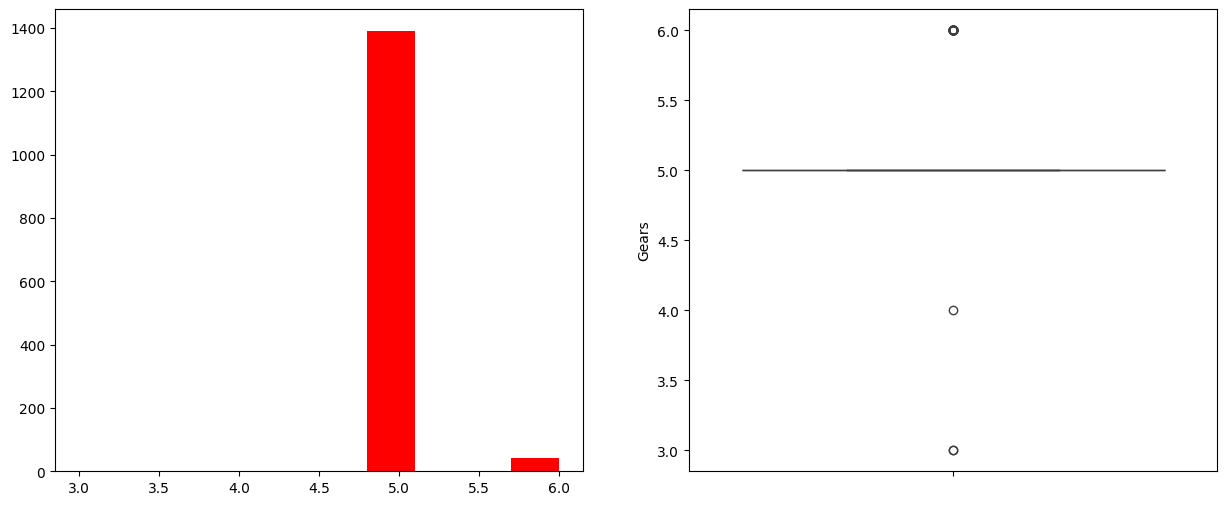

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['Gears'], color='red')
plt.subplot(1,2,2)
sns.boxplot(df['Gears'])
plt.show()

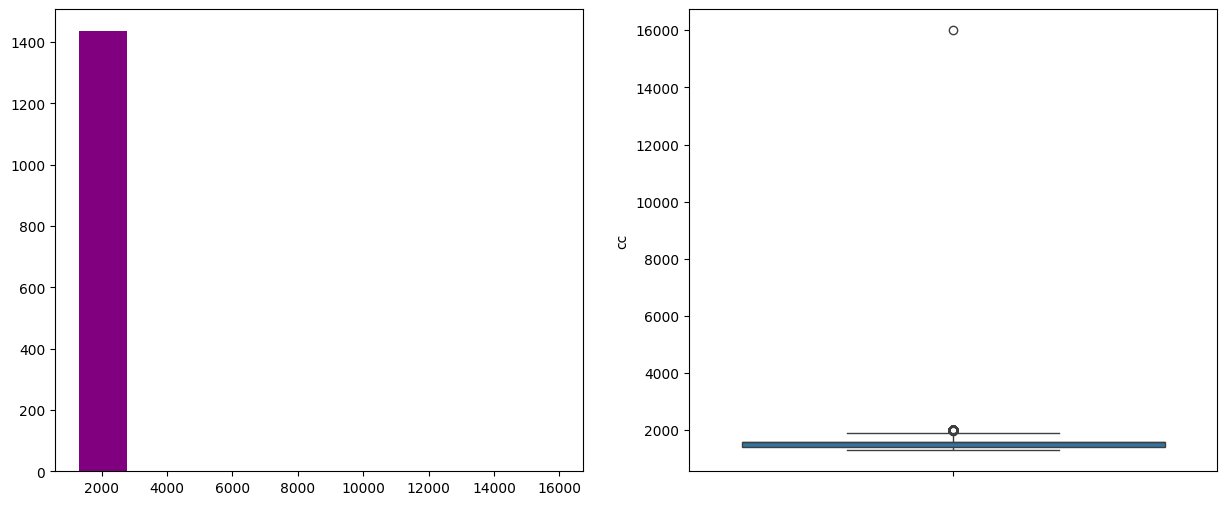

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['cc'], color='purple')
plt.subplot(1,2,2)
sns.boxplot(df['cc'])
plt.show()

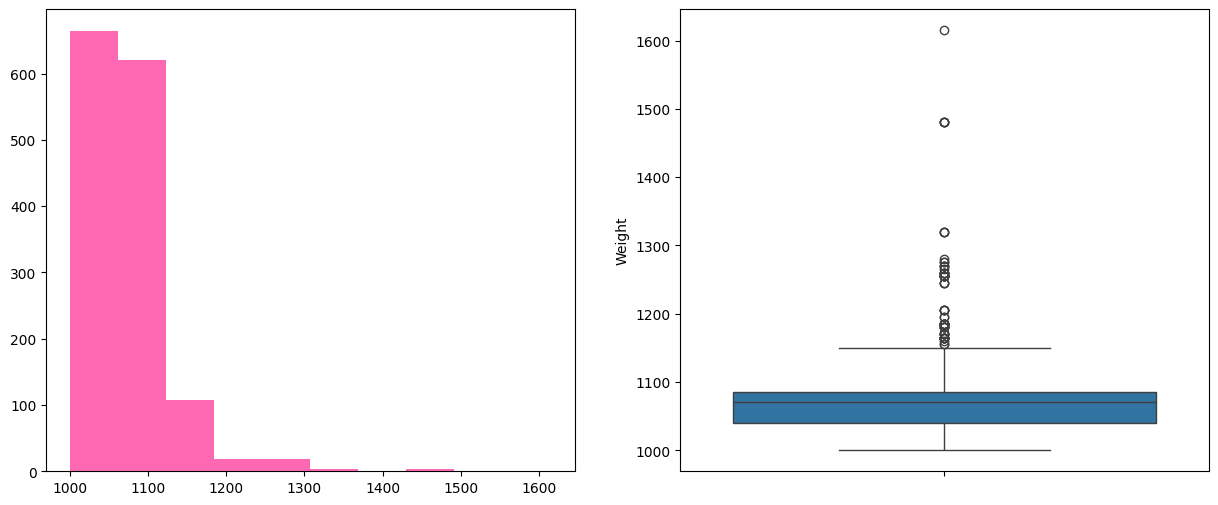

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['Weight'], color='Hotpink')
plt.subplot(1,2,2)
sns.boxplot(df['Weight'])
plt.show()

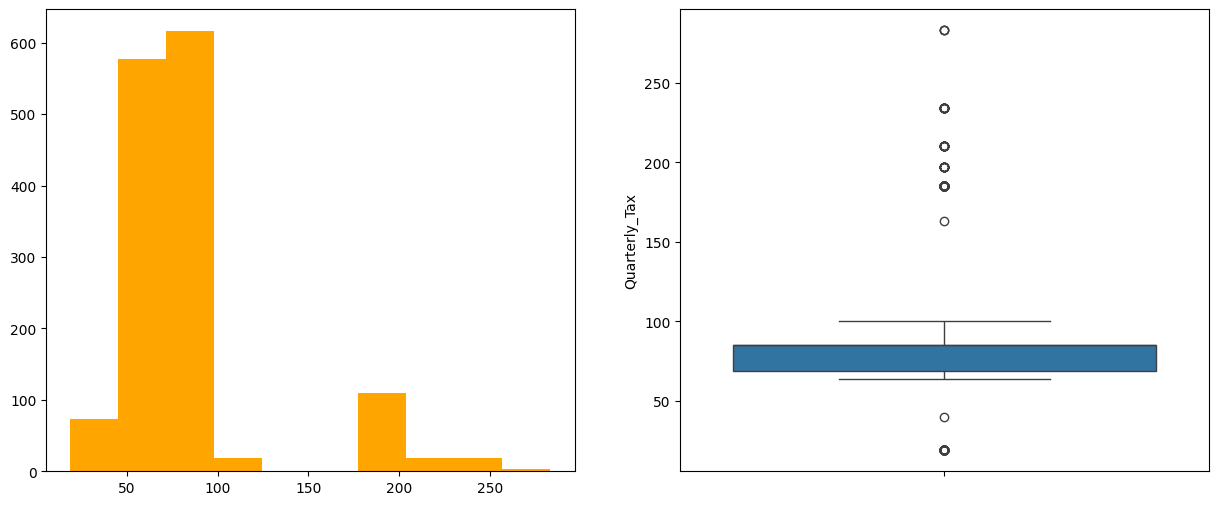

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['Quarterly_Tax'], color='orange')
plt.subplot(1,2,2)
sns.boxplot(df['Quarterly_Tax'])
plt.show()

## scatter plot between the variables

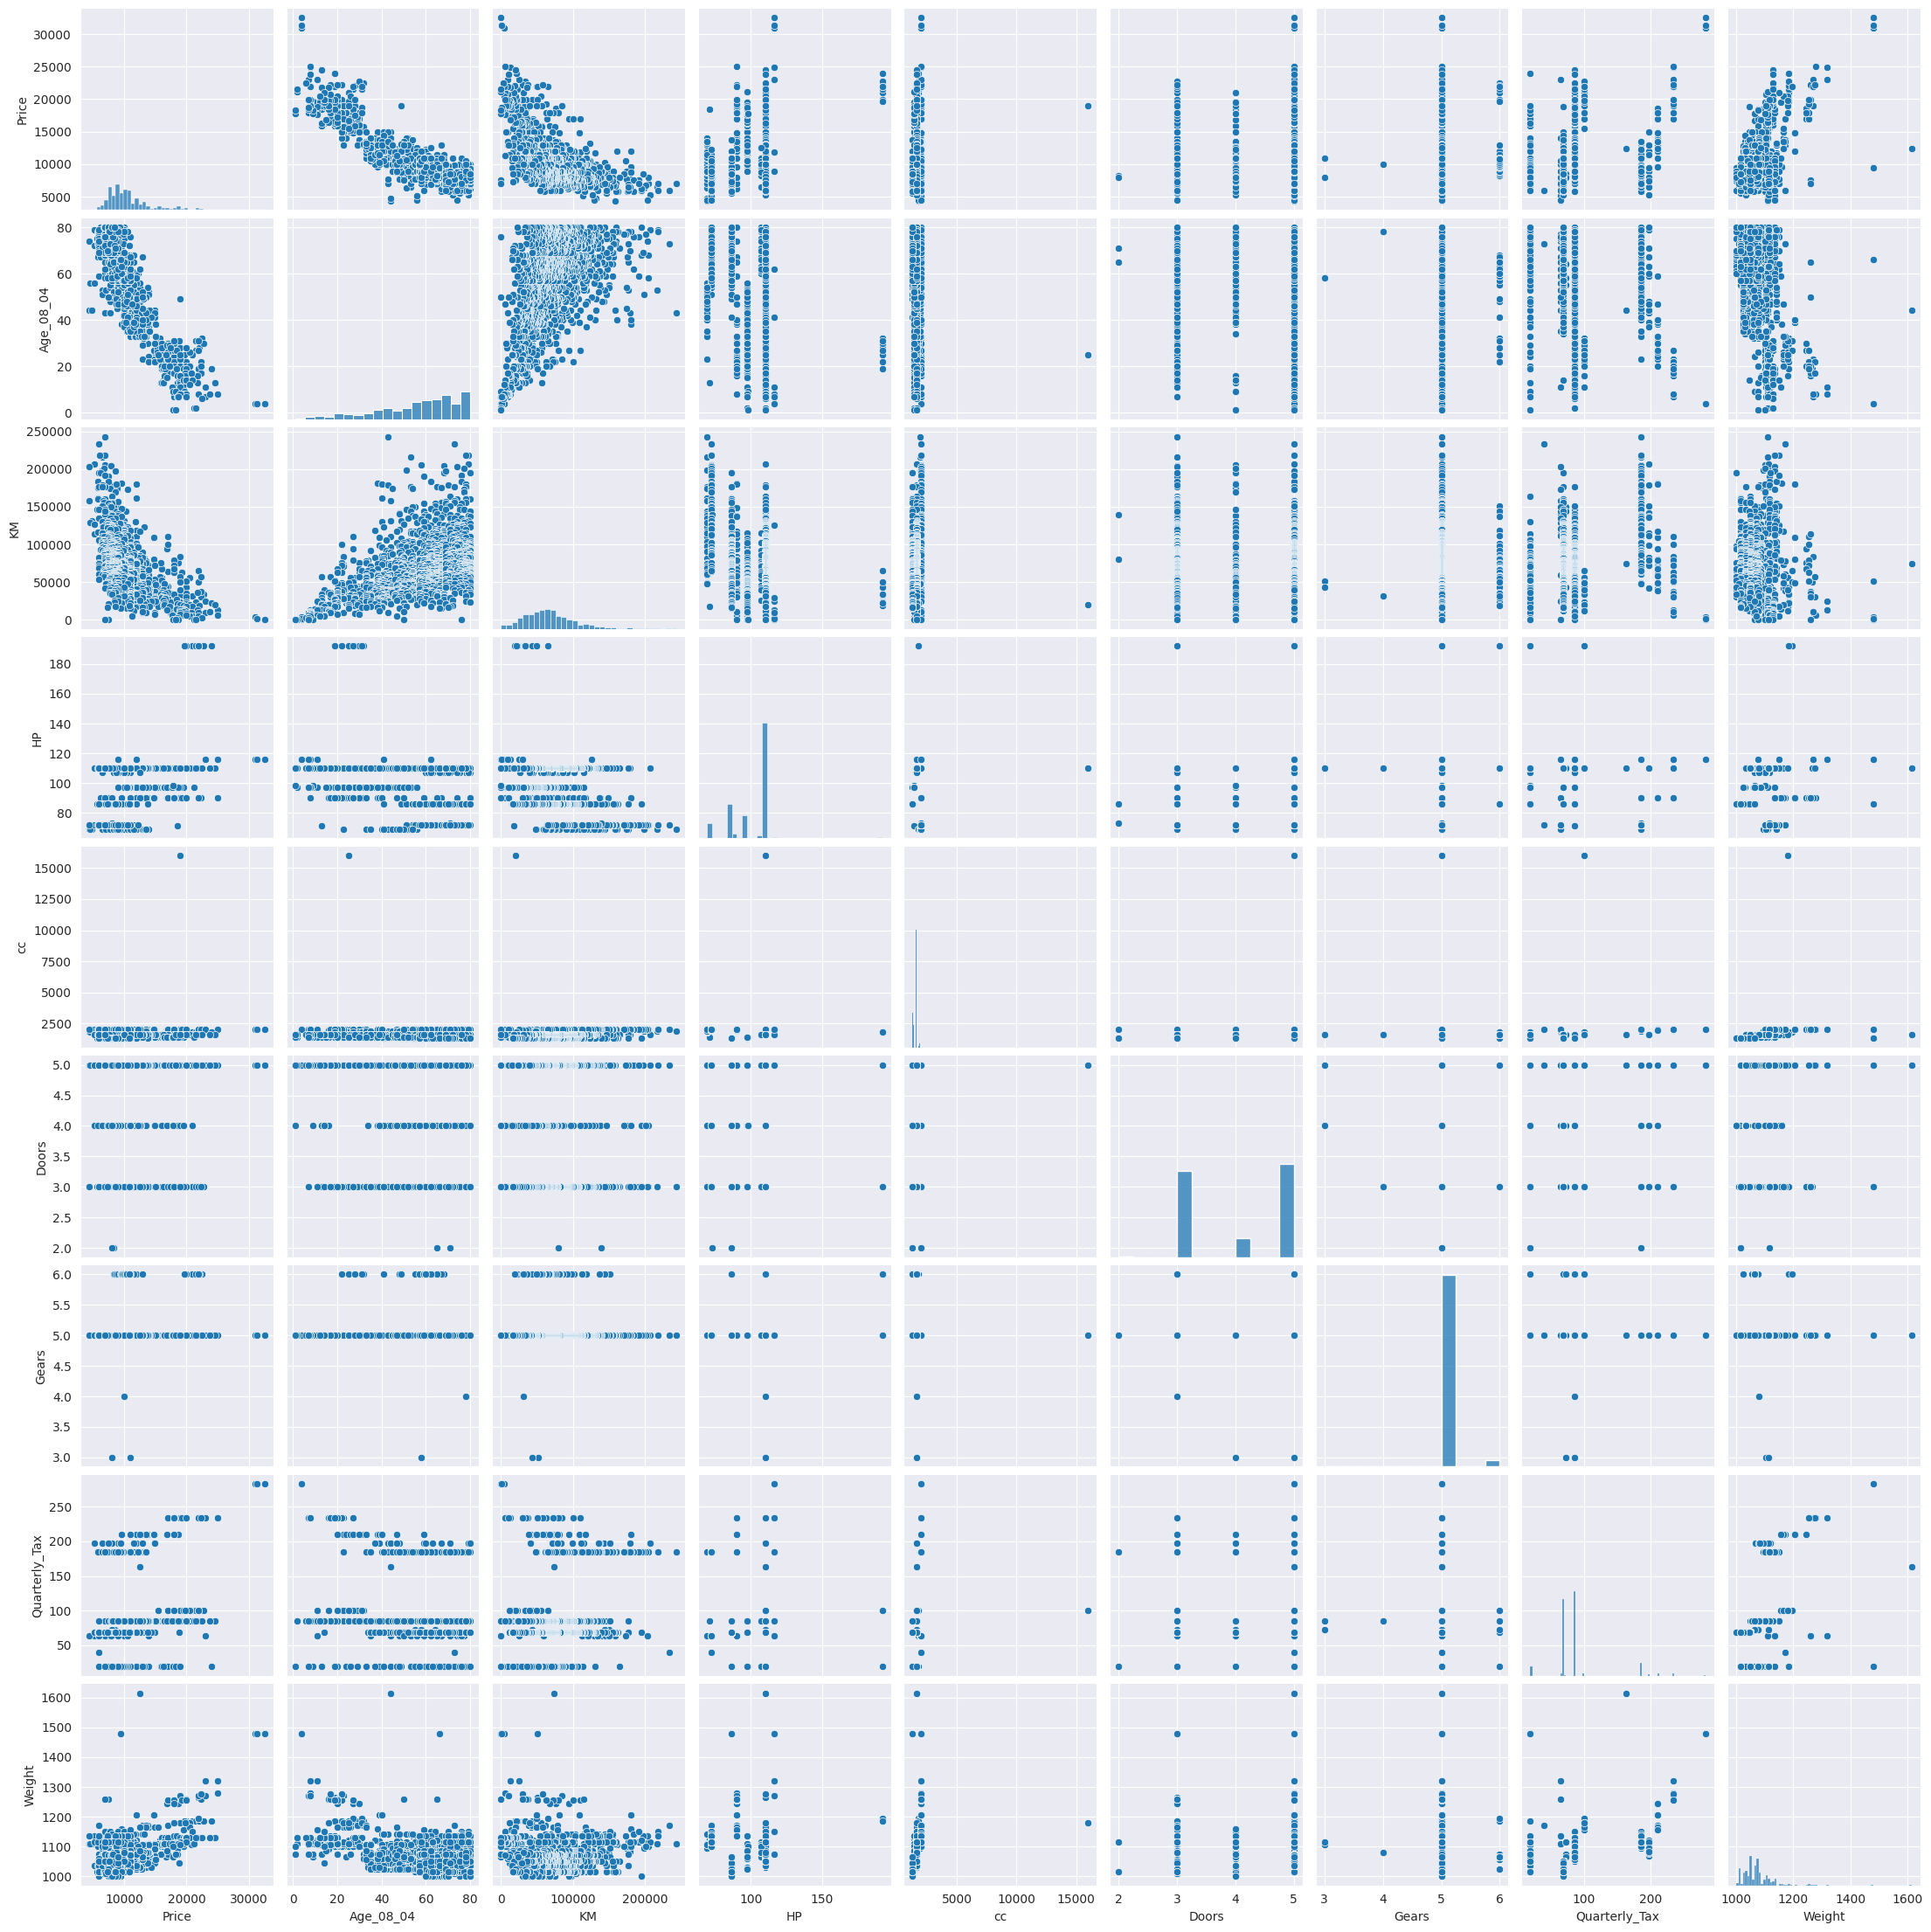

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toy1)

# Correlation matrics

In [ ]:
toy1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Text(0.5, 1.0, 'Weight')

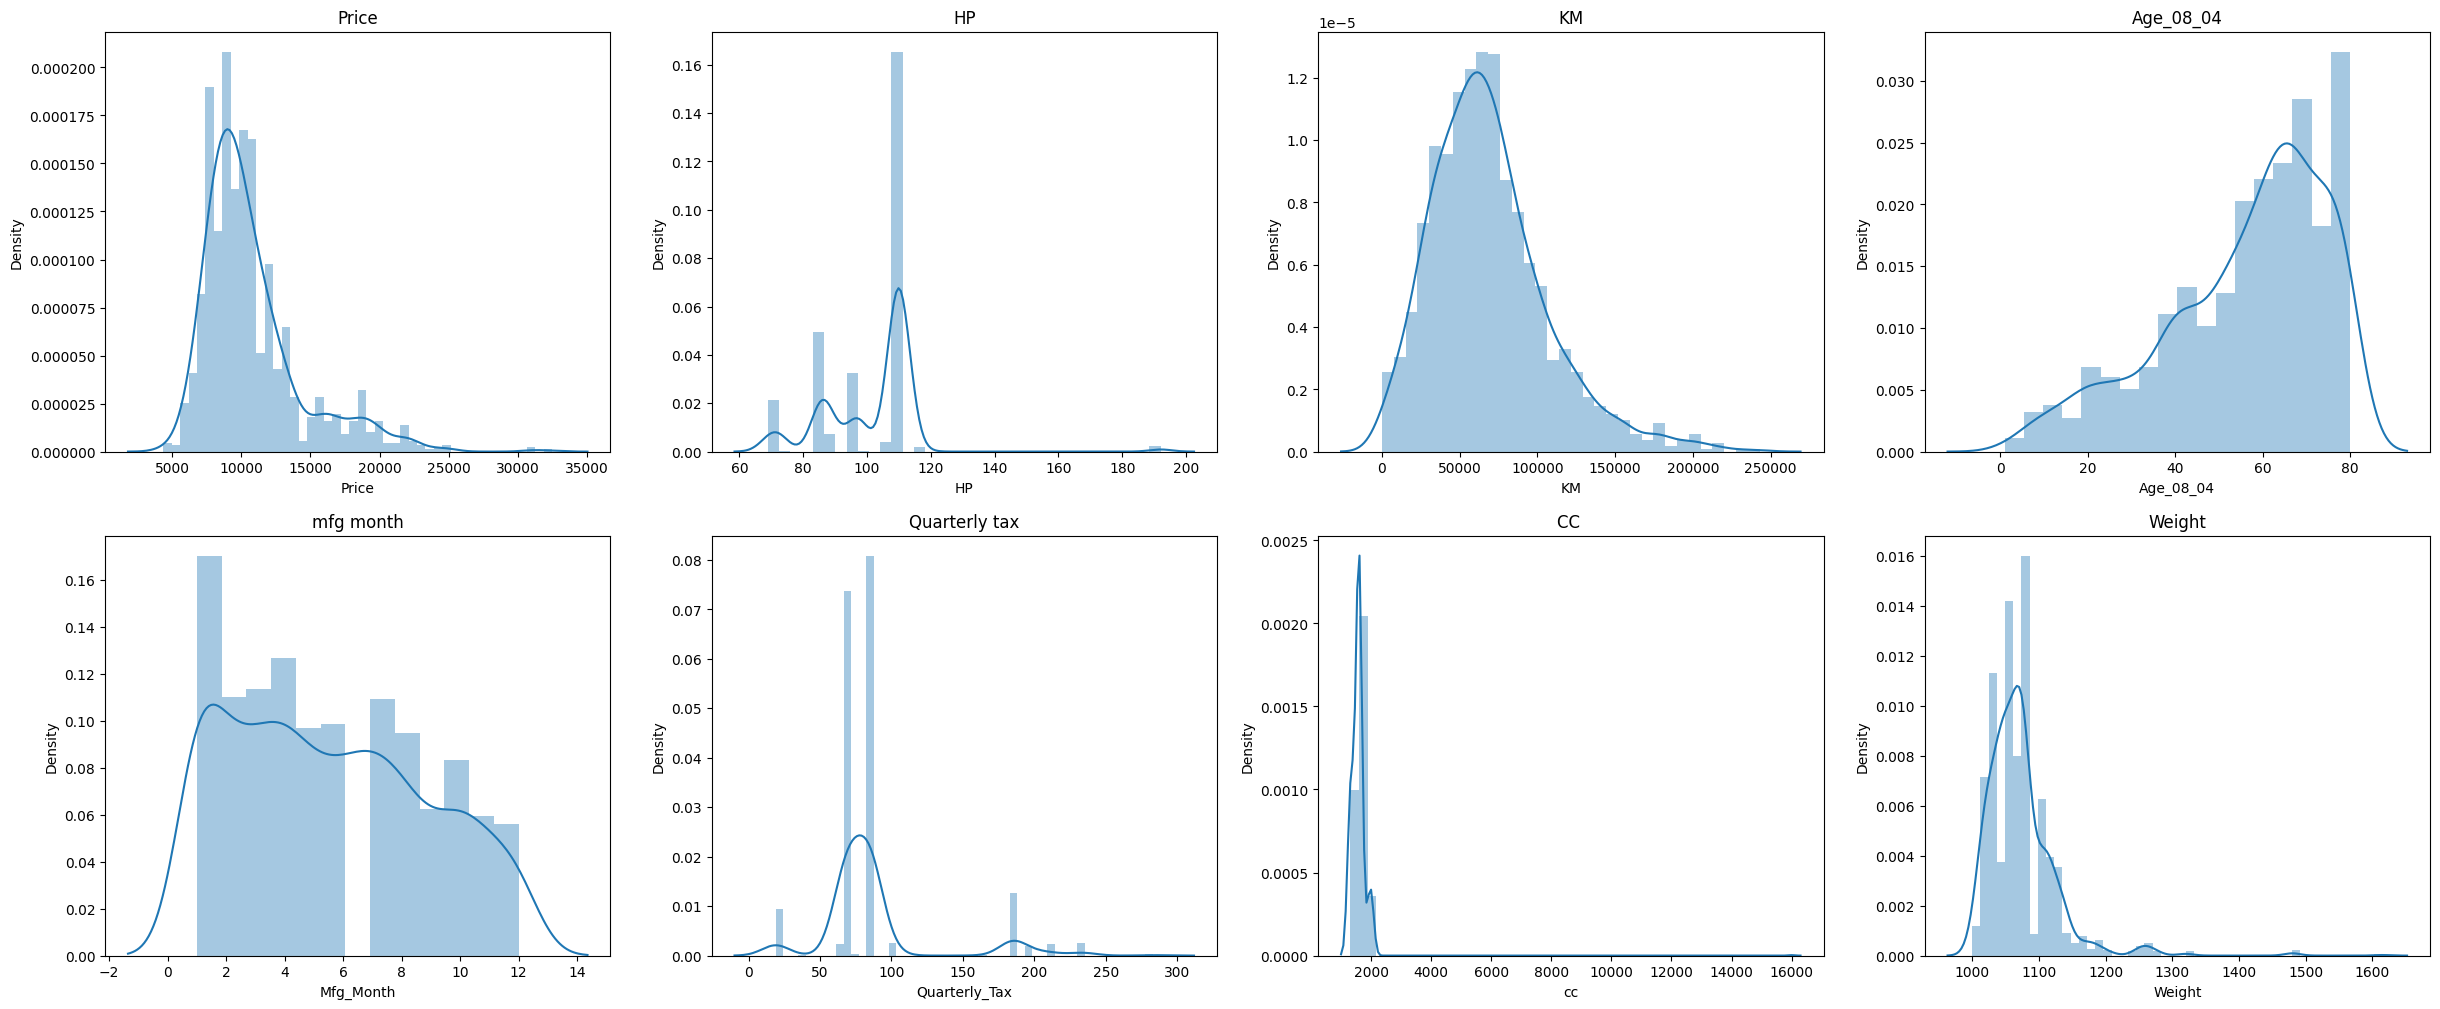

In [ ]:
plt.figure(figsize = (30,12))
plt.subplot(2,4,1)
sns.distplot(df['Price'])
plt.title('Price')
plt.subplot(2,4,2)
sns.distplot(df['HP'])
plt.title('HP')
plt.subplot(2,4,3)
sns.distplot(df['KM'])
plt.title('KM')
plt.subplot(2,4,4)
sns.distplot(df['Age_08_04'])
plt.title('Age_08_04')
plt.subplot(2,4,5)
sns.distplot(df['Mfg_Month'])
plt.title('mfg month')
plt.subplot(2,4,6)
sns.distplot(df['Quarterly_Tax'])
plt.title('Quarterly tax')
plt.subplot(2,4,7)
sns.distplot(df['cc'])
plt.title('CC ')
plt.subplot(2,4,8)
sns.distplot(df['Weight'])
plt.title('Weight')

# Model 1

### Creating a model to predict the price with the better accuracy and low error.

In [ ]:
model1=smf.ols('Price~KM+HP+Doors+Gears+cc+Age_08_04+Weight+Quarterly_Tax', data=toy1).fit()

In [ ]:
model1.params

Intercept       -5472.540368
KM                 -0.020737
HP                 31.584612
Doors              -0.920189
Gears             597.715894
cc                 -0.118558
Age_08_04        -121.713891
Weight             16.855470
Quarterly_Tax       3.858805
dtype: float64

## T and P value

In [ ]:
print(model1.tvalues,'\n', model1.pvalues)

Intercept        -3.875273
KM              -16.552424
HP               11.209719
Doors            -0.023012
Gears             3.034563
cc               -1.316436
Age_08_04       -46.551876
Weight           15.760663
Quarterly_Tax     2.944198
dtype: float64 
 Intercept         1.113392e-04
KM                1.994713e-56
HP                5.211155e-28
Doors             9.816443e-01
Gears             2.452430e-03
cc                1.882393e-01
Age_08_04        1.879217e-288
Weight            1.031118e-51
Quarterly_Tax     3.290363e-03
dtype: float64


In [ ]:
print(model1.rsquared, model1.rsquared_adj)

0.8625200256947 0.8617487495415146


In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Analysis

## Test for Normality of residuals(QQ plot)

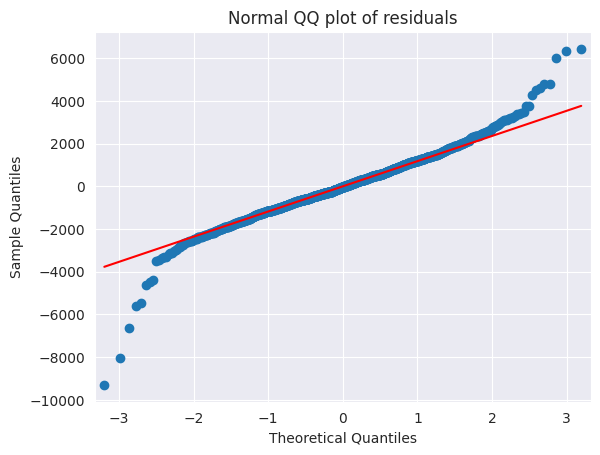

In [ ]:
qqplot=sm.qqplot(model1.resid, line='q')
plt.title("Normal QQ plot of residuals")
plt.show()

In [ ]:
list(np.where(model1.resid <-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959])]

In [ ]:
list(np.where(model1.resid>40002))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057])]

Residual plot for Homoscedasticity

In [ ]:
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()

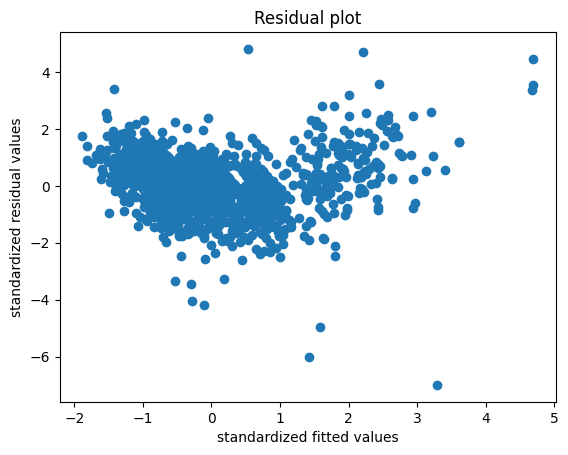

In [ ]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel("standardized residual values")
plt.show()

In [ ]:
toy2= toy1.drop(toy1.index[[109,110,111,124,146,170,190,191,220,392,401,522,600,653,959,1057]],axis=0).reset_index()

In [ ]:
toy2= toy2.drop(['index'],axis=1)

In [ ]:
toy2.shape

(1419, 9)

# Model 2

### lets improve a new model using new dataset toy2

In [ ]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toy2).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:52:33   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
Age_08_04      -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM               -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP               20.8295      2.586      8.054      0.000      15.756      25.903
cc               -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors           -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears           649.4229    172.976      3.754      0.000     310.105     988.741
Quarterly_Tax    -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight           25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Detecting influencers/Outliers

### Cooks distance

In [ ]:
model2_influence = model2.get_influence()
(c,_)=model2_influence.cooks_distance

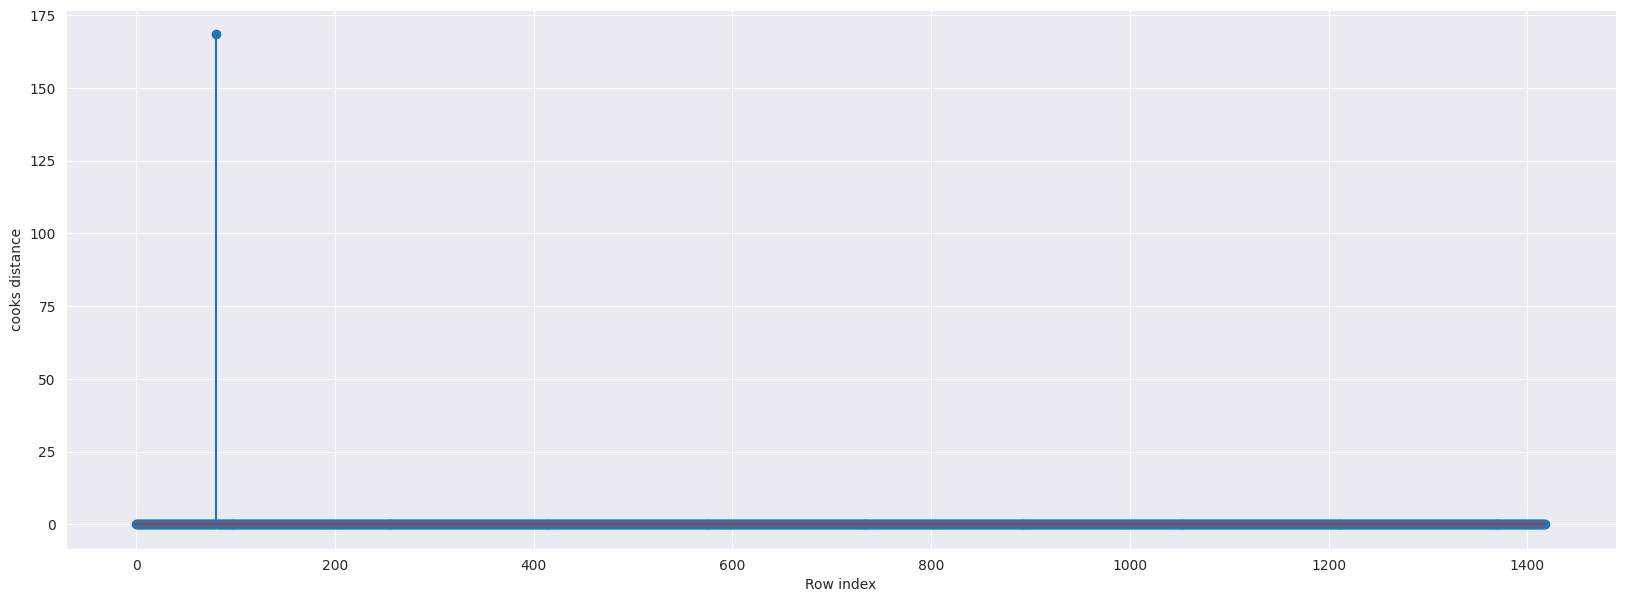

In [ ]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toy2)), np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [ ]:
(np.argmax(c), np.max(c))

(80, 79.52010624119937)

# High influence point

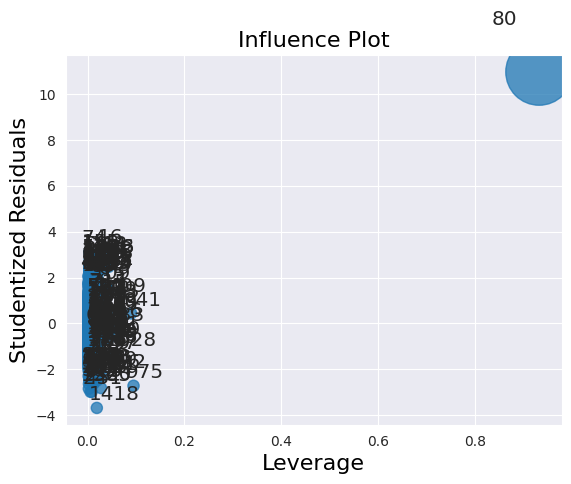

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [ ]:
k = toy2.shape[1]
n= toy2.shape[0]
lav_cutoff=3*((k+1)/n)
lav_cutoff

0.021141649048625793

### We will remove the data at index 80 from the dataset

In [ ]:
toy2[toy2.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
toy4=toy2.drop(toy2.index[[80]],axis=0).reset_index()

In [ ]:
toy4=toy4.drop(['index'],axis=1)

In [ ]:
toy4.shape

(1418, 9)

In [ ]:
toy4.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Model 3

### Predicting the price after drop the high influences value index 80

In [ ]:
model3=smf.ols('Price~KM+HP+Doors+Gears+cc+Age_08_04+Weight+Quarterly_Tax', data=toy4).fit()

In [ ]:
model3.params

Intercept       -16215.645170
KM                  -0.016945
HP                  29.924453
Doors             -134.962566
Gears              531.366319
cc                  -3.262393
Age_08_04         -110.689777
Weight              31.844244
Quarterly_Tax        1.379616
dtype: float64

In [ ]:
print(model2.rsquared, '\n', model2.rsquared_adj)

0.8825683710900464 
 0.881902092344458


In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1445.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:12:37   Log-Likelihood:                -11977.
No. Observations:                1418   AIC:                         2.397e+04
Df Residuals:                    1409   BIC:                         2.402e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.622e+04   1435.062    -11.300      0.000    -1.9e+04   -1.34e+04
KM               -0.0169      0.001    -15.231      0.000      -0.019      -0.015
HP               29.9245      2.619     11.428      0.000      24.788      35.061
Doors          -134.9626     35.177     -3.837      0.000    -203.968     -65.957
Gears           531.3663    166.454      3.192      0.001     204.842     857.891
cc               -3.2624      0.294    -11.115      0.000      -3.838      -2.687
Age_08_04      -110.6898      2.354    -47.019      0.000    -115.308    -106.072
Weight           31.8442      1.366     23.320      0.000      29.166      34.523
Quarterly_Tax     1.3796      1.347      1.024      0.306      -1.262       4.021
==============================================================================
Omnibus:                        8.891   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.119
Skew:                           0.119   Prob(JB):                      0.00635
Kurtosis:                       3.338   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cook's Distance

In [ ]:
model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

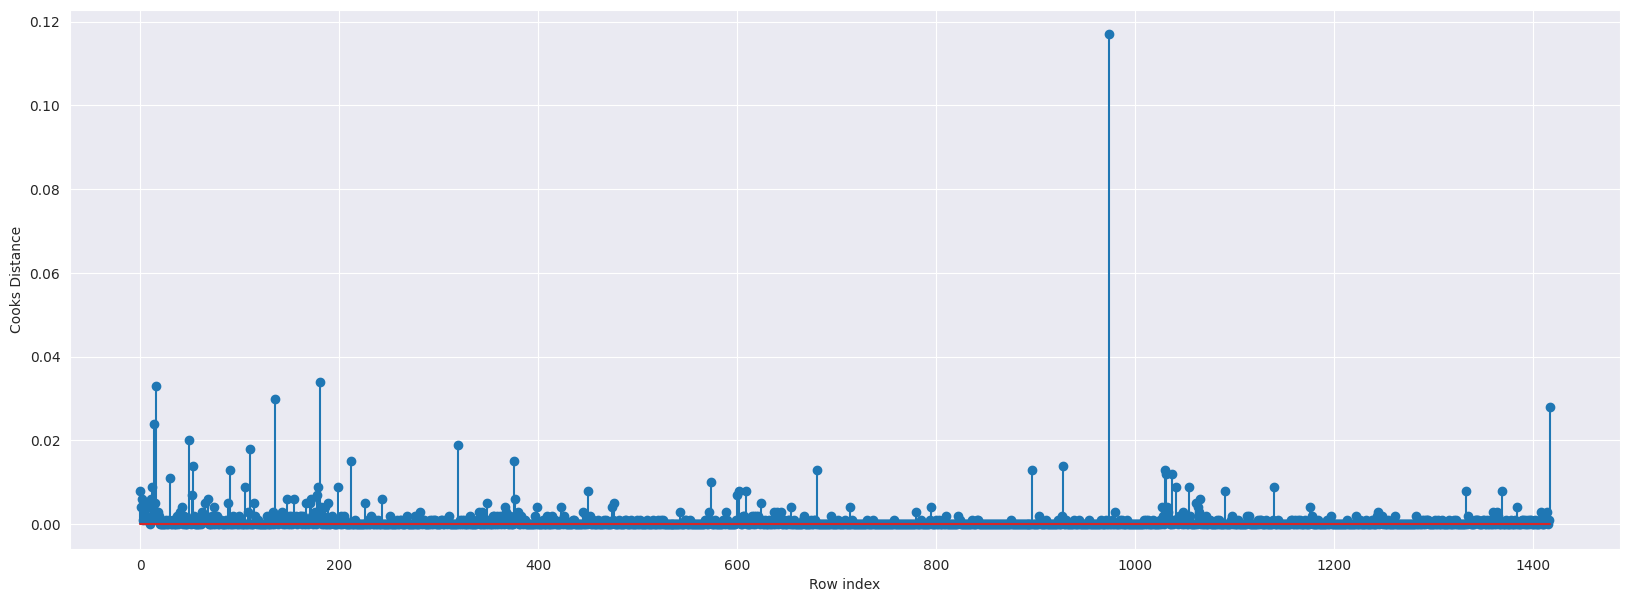

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toy4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(974, 0.11665661388550666)

## From the above plot, it is evident that data point 974 is the influencers
## We will remove the data at index 974 from the dataset

In [ ]:
toy5= toy4.drop(toy4.index[[974]],axis=0).reset_index()
toy5= toy5.drop(['index'],axis=1)

In [ ]:
toy5.shape

(1417, 9)

# Model 4

### Predicting a model excluding some more high influncer values.

In [ ]:
model4=smf.ols('Price~KM+HP+Doors+Gears+cc+Age_08_04+Weight+Quarterly_Tax', data=toy5).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1455.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:06:40   Log-Likelihood:                -11964.
No. Observations:                1417   AIC:                         2.395e+04
Df Residuals:                    1408   BIC:                         2.399e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.569e+04   1440.268    -10.892      0.000   -1.85e+04   -1.29e+04
KM               -0.0169      0.001    -15.269      0.000      -0.019      -0.015
HP               30.4886      2.616     11.653      0.000      25.356      35.621
Doors          -144.2598     35.189     -4.100      0.000    -213.288     -75.231
Gears           364.8142    174.098      2.095      0.036      23.295     706.333
cc               -3.2922      0.293    -11.246      0.000      -3.866      -2.718
Age_08_04      -110.3879      2.349    -47.001      0.000    -114.995    -105.781
Weight           32.1468      1.365     23.559      0.000      29.470      34.824
Quarterly_Tax     1.3355      1.343      0.995      0.320      -1.298       3.969
==============================================================================
Omnibus:                        9.350   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.478
Skew:                           0.131   Prob(JB):                      0.00531
Kurtosis:                       3.330   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting the price by the using the model

In [ ]:
pred=model4.predict(toy5.iloc[:,1:])
pred

0       16261.072271
1       15821.622564
2       16240.010268
3       15912.737575
4       15792.791203
            ...     
1412     9124.687591
1413     8498.201593
1414     8642.186235
1415     8754.267550
1416    10949.691989
Length: 1417, dtype: float64

In [ ]:
actual = toy5.Price

In [ ]:
squared_differences = np.square(pred - actual)
mean_squared_error = np.mean(squared_differences)
rmse = np.sqrt(mean_squared_error)
print(rmse)

1123.2127870799334


## Table of R-squared value for all model

In [ ]:
data={'model':['model1','model2','model3','model4'],'R-squared values':[0.864,0.883,0.891,0.892]}

In [ ]:
x= pd.DataFrame(data)
x

,model,R-squared values
0,model1,0.864
1,model2,0.883
2,model3,0.891
3,model4,0.892


# Conclusion:

### From all the models, it is evident that the model is higher Rsquared value is model 4 with same r squared value of 0.892.



### The RMSE value is lowest in model 1

### Thus, model 4 is best model to predict the price with a better accuracy, since it has the highest Rsquared value.